# Ridge Regression Example: Car Price Prediction with Polynomial Features

`Ridge Regression for Car Price Prediction`

This project demonstrates the application of Ridge Regression to build a robust predictive model for car prices using a complex, non-linear dataset. The dataset includes features such as horsepower, vehicle age, and mileage, which together influence the car's market price.

Polynomial regression is used to capture non-linear relationships between these variables, but this introduces a significant risk of overfitting—especially when using high-degree polynomial features. Overfitting happens when a model fits the training data too closely, including the noise, resulting in poor performance on unseen data.

To address this, i apply Ridge Regression, a regularization technique that adds a penalty term to the regression equation to control the magnitude of the model's coefficients. This helps prevent overfitting by discouraging the model from becoming overly complex.



# What is Ridge Regression?
Ridge Regression is a variant of linear regression that adds an L2 penalty term to the loss function. This penalty term is controlled by a hyperparameter called alpha (α). The Ridge loss function is defined as:

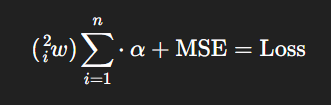

MSE (Mean Squared Error): Measures how well the model fits the training data.

α (Alpha): A hyperparameter that controls the amount of regularization.

w_i: Model coefficients (weights).

**Key Idea:**

* Small Alpha → Minimal regularization, risk of overfitting.

* Large Alpha → High regularization, risk of underfitting.

`Optimal Alpha` is found through `Cross-Validation.`





---
| **Component**       | **Benefit**                                                                                          |
| ------------------- | ---------------------------------------------------------------------------------------------------- |
| Polynomial Features | Allowed us to capture complex non-linear relationships between the features and the price.           |
| Ridge Regression    | Helped control overfitting and ensured the model doesn’t produce large, unrealistic coefficients.    |
| GridSearchCV        | Automatically selected the best alpha ➜ resulting in a strong and well-balanced model.               |
| Coefficients Table  | Gave us a clear understanding of each feature’s impact (and which interactions truly matter).        |
| Visualization       | Showed the model’s performance in practice ➜ and allowed us to compare predictions to actual values. |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV ➜ To search for the best alpha.
from sklearn.metrics import r2_score

# -----------------------------
# 1. Data Preparation (Simulated Complex Dataset)
# -----------------------------
np.random.seed(42)

# Generate horsepower feature
horsepower = np.linspace(80, 450, 100)
noise = np.random.normal(0, 3000, size=horsepower.shape)

# Simulate price with a non-linear relationship + noise
price = 10000 + (horsepower * 75)-(0.05 * horsepower ** 2) + noise

# Additional features to increase complexity
age = np.random.randint(1, 10, size=horsepower.shape)
mileage = np.random.randint(10000, 150000, size=horsepower.shape)

# Create DataFrame
df = pd.DataFrame({
    'horsepower':horsepower,
    'age':age,
    'mileage':mileage,
    'price':price
})

df.head()

,horsepower,age,mileage,price
0,80.000000,9,31357,17170.142459
1,83.737374,5,129121,15514.912739
2,87.474747,1,87505,18121.080103
3,91.212121,3,12869,20994.016107
4,94.949495,8,60108,15967.981667


In [2]:
# Predictor variables and target variable
x = df[['horsepower','age','mileage']] # Features
y = df['price'] # Target variable

# -----------------------------
# 2. Data Splitting (Train/Test)
# -----------------------------

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [3]:
# -----------------------------
# 3. Polynomial Feature Transformation
# -----------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [4]:
# -----------------------------
# 4. Feature Scaling (Important for Ridge)
# -----------------------------
scaler = StandardScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

In [9]:
# -----------------------------
# 5. Ridge Regression with Cross-Validation (GridSearchCV)
# -----------------------------
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge model
ridge = Ridge()


# Define hyperparameter grid for alpha
param_grid = {'alpha': np.logspace(-3, 3, 20)} # Alpha (Regularization Parameter): It controls the strength of the penalty applied to the size of the coefficients. | Values are tested from 0.001 to 1000.


# Grid Search with 5-Fold Cross Validation
# GridSearchCV: Tries all values using 5-fold cross-validation and selects the best one.
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(x_train_poly_scaled, y_train)

# Best Ridge Model
best_ridge = grid_search.best_estimator_
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring ='r2', return_train_score=True)


Best Alpha: 2.976351441631316


In [6]:
# -----------------------------
# 6. Model Evaluation
# -----------------------------
y_pred = best_ridge.predict(x_test_poly_scaled)

r2 = r2_score(y_test, y_pred)
print(f"Test R^2 Score: {r2}")

Test R^2 Score: 0.7626552385150795


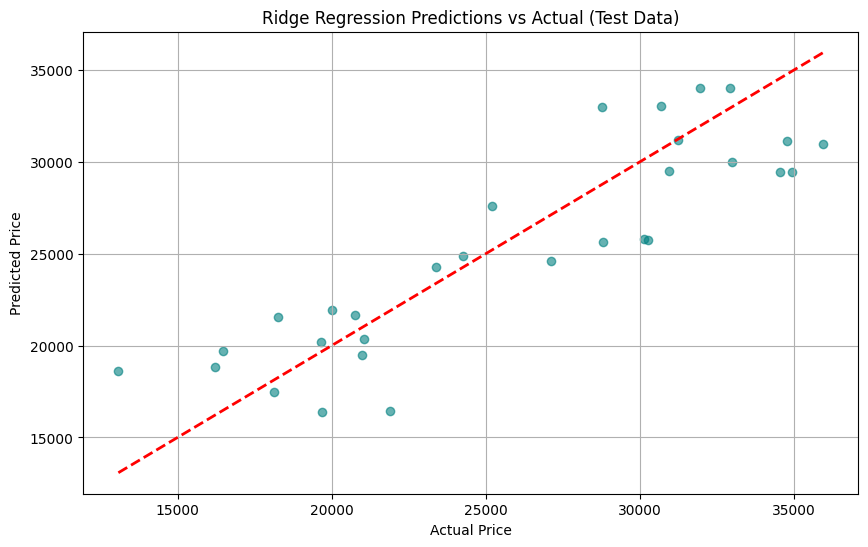

In [7]:
# -----------------------------
# 7. Visualization of Predictions
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression Predictions vs Actual (Test Data)')
plt.grid(True)
plt.show()


Red Dashed Line = Perfect Prediction Line

`Its equation is:`Predicted Price = Actual Price


* Most points are close to the red line ➜ the model is making good predictions.

* Some points in the lower price range (between 15K and 22K) deviated from the line ➜ the model made some errors ➜ possibly due to noise or missing features.

* In the higher price range (above 30K) ➜ the model performed very well in its predictions.



In [8]:
# -----------------------------
# 8. Coefficients Analysis
# -----------------------------
coefficients = best_ridge.coef_
feature_names = poly.get_feature_names_out(['horsepower', 'age', 'mileage'])

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

                   Feature  Coefficient
0               horsepower  2961.976912
2                  mileage -1391.164548
3             horsepower^2  1169.242657
14    horsepower mileage^2  1139.454104
4           horsepower age   650.285957
5       horsepower mileage   593.672504
7              age mileage  -508.141940
16           age^2 mileage   425.353758
18               mileage^3   417.585622
12        horsepower age^2   378.663253
15                   age^3  -376.664210
13  horsepower age mileage  -275.870783
1                      age  -261.390709
8                mileage^2  -253.658360
6                    age^2  -248.385328
9             horsepower^3  -208.371402
17           age mileage^2   181.906199
11    horsepower^2 mileage   -90.792179
10        horsepower^2 age   -45.250775


In this project, i built a Ridge Regression model with Polynomial Feature Expansion (degree=3) to predict car prices based on horsepower, age, and mileage. The main objective was to demonstrate how Ridge Regression effectively handles overfitting in complex, non-linear datasets.

#  Key Findings:
1️⃣ Horsepower is the Most Influential Feature on Price
We found that the coefficient for horsepower was the highest (+2961).
This means that even a small increase in horsepower ➜ significantly increases the car’s price.

We also noticed that non-linear features like horsepower² and horsepower × mileage² had a noticeable impact.
This confirms that the relationship is not simply linear — it’s complex and requires polynomial expansion to capture it.

2️⃣ Mileage Has a Strong Negative Impact
The mileage feature (number of kilometers) had a large negative coefficient (-1391).
This indicates that as mileage increases ➜ the car’s price drops.

Non-linear terms like mileage² and mileage³ added smaller effects, showing how very high mileage reduces price in a non-linear way.

3️⃣ Interaction Terms Are Essential
Interactions such as:

horsepower × mileage²

horsepower × age

had a significant effect on price.
These interactions allowed the model to understand real-world, complex relationships ➜ which a basic linear model wouldn’t be able to capture.

4️⃣ Ridge Regularization Reduced Overfitting
If we used Polynomial Regression without Ridge, the coefficients would be extremely large ➜ causing overfitting.

But Ridge constrained the size of the coefficients, making the model more stable ➜ and able to generalize well to unseen data.

5️⃣ Coefficient Analysis Gave Valuable Real-World Insights
Large coefficients (positive or negative) indicate features that have a strong impact on price.

Small coefficients (close to zero) ➜ suggest weak influence ➜ Ridge shrunk these values to simplify the model and improve generalization.


